<a href="https://colab.research.google.com/github/yachika-yashu/yachika-yashu/blob/main/JPMorganChase/data_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load the uploaded CSV file to inspect its structure
file_path = 'Nat_Gas.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [42]:
# Convert Dates column to datetime
df['Dates'] = pd.to_datetime(df['Dates'])
# Set the date as the index
df.set_index('Dates', inplace=True)


<ipython-input-42-9224c900b839>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


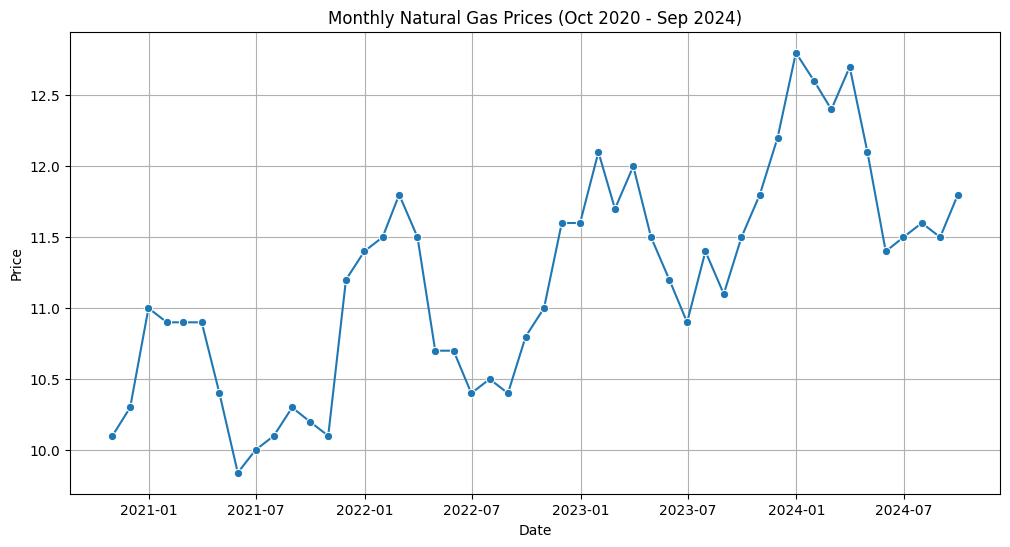

In [43]:
# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Dates', y='Prices', marker='o')
plt.title('Monthly Natural Gas Prices (Oct 2020 - Sep 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [44]:
# Prepare the data for linear regression model
df
df['Days'] = (df.index - df.index.min()).days
# here we created a new column Days which represents
#the number of days since the start of the dataset by subtracting the minimum date in the dataset from each date.
X = df[['Days']]
y = df['Prices']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:

#Making Predictions:

#To estimate the price of natural gas on a given date, we will convert the input date to the number
# of days since the start of the dataset.
#We will then use the trained model to predict the price for that number of days using the predict method.
def estimate_price(date_str):
    date = datetime.strptime(date_str, '%m/%d/%y')
    days = (date - df.index.min()).days
    estimated_price = model.predict([[days]])
    return estimated_price[0]


In [51]:
# Extrapolate the prices for one year into the future
#here We generate future dates for one year into the future_dates and
#convert them to the number of days since the start of the dataset.
#We use the trained model to predict the prices for these future dates.
future_dates = [df.index.max() + timedelta(days=i) for i in range(1, 366)]
future_days = [(date - df.index.min()).days for date in future_dates]
future_prices = model.predict(np.array(future_days).reshape(-1, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
# Take date input from user and estimate price on that date
from datetime import datetime, timedelta
user_date = input("Enter a date (MM/DD/YY): ")
estimated_price = estimate_price(user_date)
print(f"The estimated price of natural gas on {user_date} is {estimated_price:.2f}.")

Enter a date (MM/DD/YY): 02/02/25
The estimated price of natural gas on 02/02/25 is 12.29.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


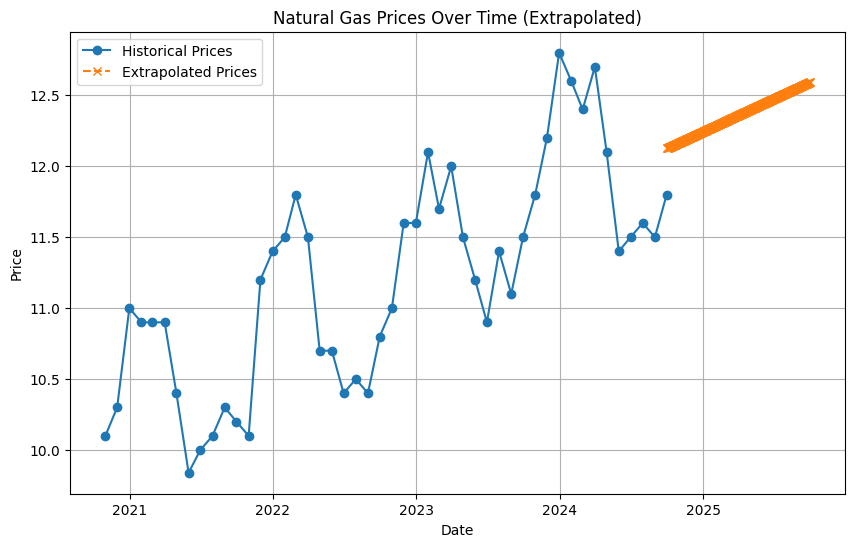

In [52]:
# Plot the extrapolated prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_dates, future_prices, marker='x', linestyle='--', label='Extrapolated Prices')
plt.title('Natural Gas Prices Over Time (Extrapolated)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()